## Proyek Analisis Data: Bike Sharing Dataset

- **Nama**: Elsa Maulida Pangesti
- **Email**: elsa.maulida256@gmail.com
- **ID Dicoding**: elsamlda

## Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana frekuensi peminjam sepeda per bulan pada 2011 dan 2012?
- Pertanyaan 2: Bagaimana proporsi jumlah peminjam sepeda berdasarkan musim?
- Pertanyaan 3: Bagaimana jumlah penyewa sepeda berdasarkan cuaca pada hari tersebut

## Import Packages/Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling
### Gathering Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/elsamaulida5/project-dashboard/main/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assesing Data

In [3]:
# Menilai data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan output tersebut, dapat diketahui bahwa tidak ada masalah dengan data dari seluruh kolom tersebut. 

In [4]:
# Memastikan tidak ada missing value
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan ouput data tidak memiliki missing value

In [5]:
# Memastikan data duplikat
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 0


In [6]:
# Melihat deskriptif data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Karena tidak terdapat data missing value dan data duplikat maka data siap digunakan untuk analisis lebih lanjut

## Exploratory Data Analysis

In [7]:
data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [8]:
# Mengubah data kategori musim kedalam jenis kategorinya dalam string
season_dict = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengubah data season angka ke kategori
data['season'] = data['season'].map(season_dict)
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
# Mengubah data cuaca
weather_dict = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

data['weathersit'] = data['weathersit'].map(weather_dict)
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,0,4,1,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,12,0,5,1,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,12,0,6,0,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,12,0,0,0,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [10]:
# Mengelompokkan ada peminjaman sepeda berdasarkan musim
data.groupby(by="season").agg({
    "cnt": "sum",
    "registered": "sum",
    "casual": "sum"
})

,cnt,registered,casual
season,,,
Fall,1061129,835038,226091
Spring,471348,410726,60622
Summer,918589,715067,203522
Winter,841613,711831,129782


In [11]:
# Mengelompokkan data berdasarkan tahun dan season
year_dict = {
    0: 2011,
    1: 2012
}

data['yr'] = data['yr'].map(year_dict)
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,12,0,4,1,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,12,0,5,1,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,12,0,6,0,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,12,0,0,0,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [12]:
# Mengelompokkan data berdasarkan tahun dan musim
data.groupby(by=["yr", "season"]).agg({
    "cnt": "sum",
    "registered": "sum",
    "casual": "sum"
})

cnt  registered  casual
yr   season                            
2011 Fall    419650      324200   95450
     Spring  150000      128575   21425
     Summer  347316      269752   77564
     Winter  326137      273324   52813
2012 Fall    641479      510838  130641
     Spring  321348      282151   39197
     Summer  571273      445315  125958
     Winter  515476      438507   76969

## Visualization & Explanatory Analysis

- Pertanyaan 1: Bagaimana frekuensi peminjam sepeda  pada 2011-2012?


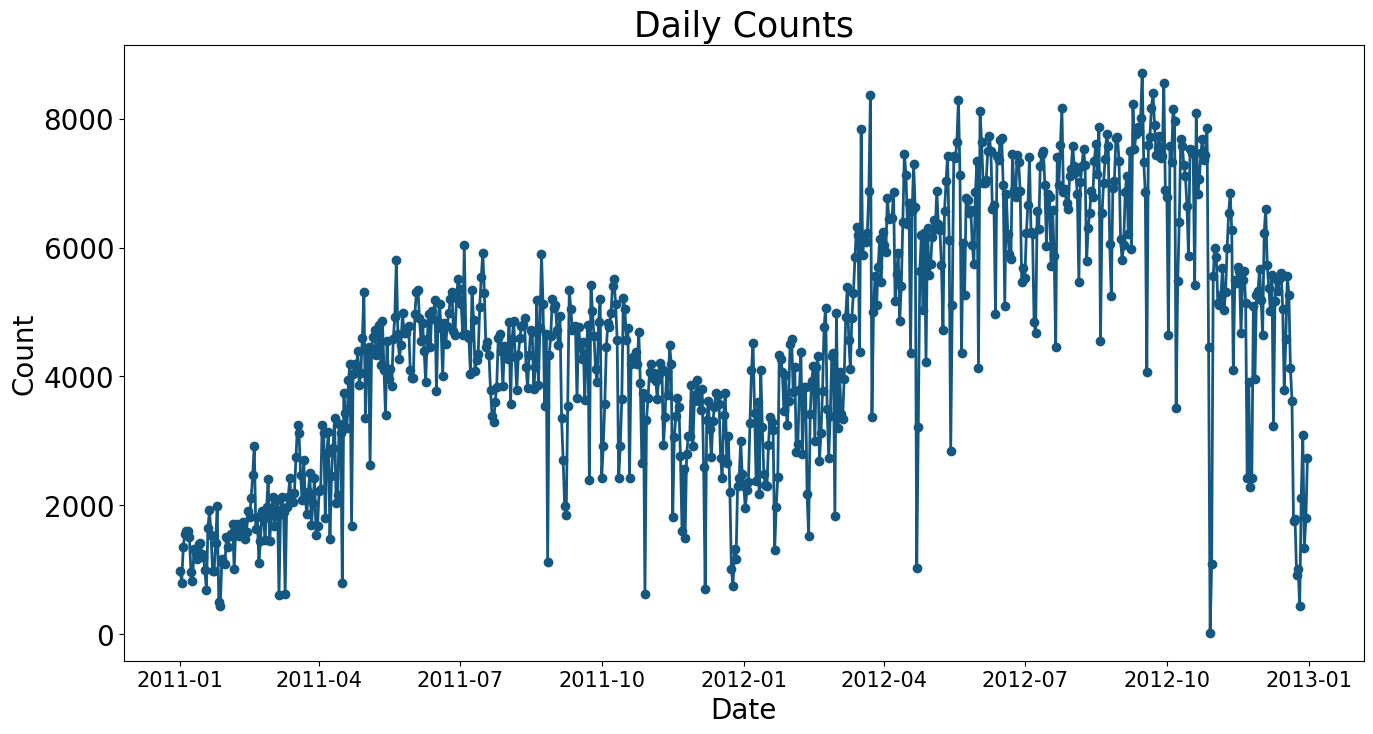

In [13]:
# Membuat Line Plot Penyewa Harian
# Memastikan data berupa datetime
data['dteday'] = pd.to_datetime(data['dteday'])

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    data["dteday"],
    data["cnt"],
    marker='o', 
    linewidth=2,
    color="#145780",
    label='Daily Counts'
)

# Label sumbu x dan y
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

# Judul plot
ax.set_title('Daily Counts', fontsize=25)

ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

# Ambil data unik untuk bulan dan tahun
unique_dates = data["dteday"].dt.strftime('%Y-%m').unique()

# Buat label untuk setiap bulan
for date in unique_dates:
    data_for_month = data[data["dteday"].dt.strftime('%Y-%m') == date]
    ax.plot([], [], label=date, linewidth=0)

plt.show()


- Pertanyaan 2: Bagaimana proporsi peminjam sepeda berdasarkan musim?

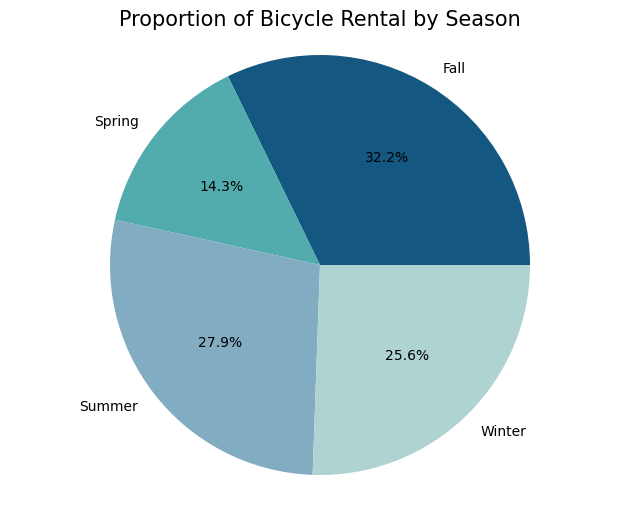

In [14]:
# mengelompokkan data musim
data_musim = data.groupby(by=["season"]).agg({
    "cnt": "sum",
})
data_musim
# Membuat pie chart untuk jumlah peminjam sepeda berdasarkan musim
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data_musim['cnt'], labels=data_musim.index, autopct='%1.1f%%', colors=['#145780', '#52acae', '#81acc1', '#afd3d0'])
ax.axis('equal') 

# Membuat Judul 
ax.set_title('Proportion of Bicycle Rental by Season', fontsize=15)

# Menampilkan plot
plt.show()

- Pertanyaan 3: Bagaimana jumlah penyewa sepeda berdasarkan cuaca pada hari tersebut?


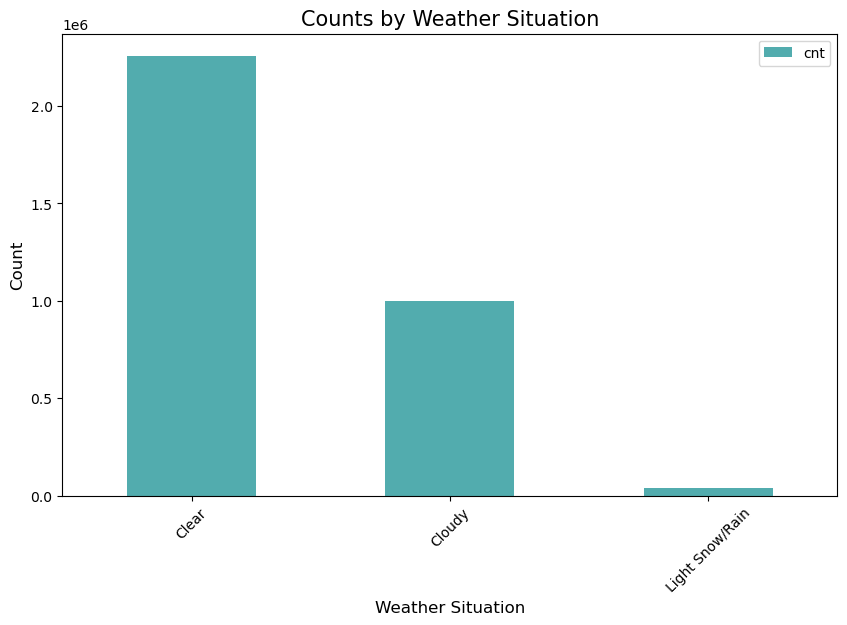

In [15]:
# Kelompokkan data berdasarkan cuaca dan hitung jumlah observasi untuk setiap kategori cuaca
data_cuaca = data.groupby(by=["weathersit"]).agg({
    "cnt": "sum",
})
data_cuaca
#Membuat Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
data_cuaca.plot(kind='bar', color='#52acae', ax=ax)

# Membuat laebl x dan y 
ax.set_xlabel('Weather Situation', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(data_cuaca.index, rotation=45)

# Membuat judul plot
ax.set_title('Counts by Weather Situation', fontsize=15)

# Tampilkan plot
plt.show()

## Conclusion

#### Pertanyaan 1: 
- Terdapat kesamaan dalam pola penurunan frekuensi peminjaman sepeda pada bulan September-Desember di sepanjang tahun 2011-2012 tersebut. Hal ini mungkin menunjukkan adanya faktor-faktor yang serupa atau musiman yang mempengaruhi kegiatan peminjaman sepeda selama periode tersebut.
- Peningkatan signifikan dalam frekuensi peminjaman sepeda mulai bulan Februari menunjukkan adanya perubahan yang terjadi setelah periode penurunan pada bulan-bulan sebelumnya. Ini mungkin terkait dengan faktor-faktor musiman atau perubahan dalam kondisi cuaca atau situasi lainnya.
- Pada tahun 2011, puncak frekuensi peminjaman sepeda terjadi pada bulan Juni, sementara pada tahun 2012 terjadi pada bulan September. Perbedaan ini menunjukkan variasi dalam pola penggunaan sepeda antara tahun-tahun tersebut, yang mungkin dipengaruhi oleh faktor-faktor seperti perubahan dalam kebijakan peminjaman sepeda, cuaca, atau peristiwa musiman.
- Jumlah peminjam sepeda tertinggi terdapat pada Bulan Oktober 2012

#### Pertanyaan 2: 
Berdasarkan data pada pie chart, dapat disimpulkan bahwa frekuensi peminjaman sepeda terbanyak terjadi pada musim gugur (Fall) dengan persentase sebesar 32,2%, diikuti oleh musim panas (Summer) dengan 27,9%. Sementara itu, frekuensi peminjaman sepeda terendah terjadi pada musim semi (Spring) dengan persentase 14,3%. Musim dingin (Winter) memiliki persentase sebesar 25,6%. Dengan demikian, musim gugur menjadi musim favorit bagi para peminjam sepeda, sedangkan musim semi menjadi musim dengan frekuensi peminjaman sepeda yang paling rendah.

#### Pertanyaan 3: 
Bar chart di atas menggambarkan jumlah penyewa sepeda (cnt) untuk setiap situasi cuaca (weathersit). Dari data yang diamati, terdapat tiga kategori situasi cuaca yang diamati: "Cerah", "Berawan", dan "Hujan/Salju Ringan".

Pada situasi cuaca "Cerah", penyewa sepeda mencapai sekitar 2.257.952 pada tahun 2011-2012, hal ini menunjukkan bahwa cuaca cerah adalah ycuaca yang paling diminati untuk bersepeda. Selain itu, pada cuaca "Berawan" terdapat sekitar 996.858 penyewa sepeda, hal ini menunjukkan bahwa pada cuaca berwan banyak yang menyewa sepeda namun tidak sebanyak ketika cuaca cerah. Sedangkan, situasi cuaca "Hujan/Salju Ringan" memiliki jumlah peminjam sepeda yang sangat rendah, hanya sekitar 37.869, menunjukkan bahwa cuaca dengan hujan atau salju ringan masyarakat cednderung memilih untuk tidak menyewa sepeda. Selain itu, dalam pengkategorian ini terdapat pula cuaca "Hujan/Salju Lebat" dimana tidak ada penyewa sepeda 

Dengan demikian, dapat disimpulkan bahwa cuaca cerah adalah cuaca yang paling diminati penyewa sepeda, sementara cuaca dengan hujan atau salju ringan adalah yang paling tidak diminati.
